<h1><font color="black">Part 1</font></h1>

<h2><font color="black">Linear Programming</font></h2>

<h4><font color="black">Definition: Linear programming is a mathematical technique for maximizing or minimizing a linear function of several variables.</font></h4>

In [1]:
# Imports needed
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
from matplotlib.patches import Polygon

<h4><font color="red">User will have to run either "conda install sympy" or "pip install sympy" in order to import all libraries for this project.</font></h4>

<h3><font color="black">Solving A Simple System</font></h3>

In [2]:
# Recall: Ax = b
# Solve for x, y, and z
A = np.array([[4., -2., 1.], [-2., 4., -2.], [1., -2., 4.]])
b = np.array([11., -16., 17.])
x = np.linalg.solve(A, b)

print(" x ", "  y  ", "z")
print(*x)

 x    y   z
1.0 -2.0 3.0


<h3><font color="black">A Geometric Approach to Linear Programming in Two Dimensions</font></h3>

<Figure size 720x648 with 0 Axes>

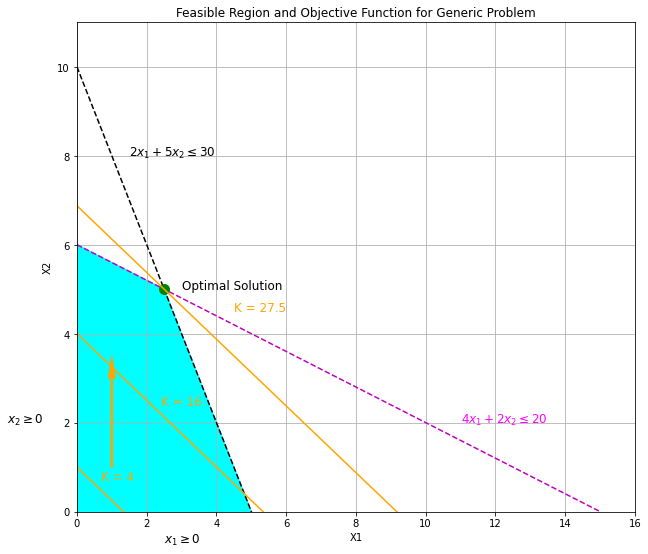

In [3]:
#################### CONSTRAINTS ####################
# First Constraint: 2x1 + 5x2 ≤ 30
# Second Constraint: 4x1 + 2x2 ≤ 20
# Non-Negativity Constraints: x1, x2 ≥ 0
# This is the function we want to maximize: P(x1,x2) = 3x1 + 4x2 => x2 = (-3/4)x1 + (K/4)

# Set functions for constraints
def f1(x):
    return (30-2*x)/5
def f2(x):
    return (20-4*x)/2
def f3(x,K):
    return (-3/4)*x+(K/4)

# Use a symbolic variables in order to find the solution space
x = Symbol('x')
x1, =  solve(f1(x)-f2(x)) 
x2 = f1(x1)

# Get data for the linear equations
xr = np.linspace(0,15,100)
y1r = f1(xr)
y2r = f2(xr)

# Find solutions to the objective function
K1 = 4
slopeK1 = f3(xr,K1)
K2 =16
slopeK2 = f3(xr,K2)
K3 = 27.5
slopeK3 = f3(xr,K3)

# Plot the linear equations and fill the feasible region
plt.figure(figsize=(10,9))
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Feasible Region and Objective Function for Generic Problem")
plt.xlabel("X1")
plt.ylabel("X2")
plt.plot(xr ,y1r, 'm--')
plt.plot(xr, y2r, 'k--')
# Plot a marker at the intersection
plt.plot(x1, x2, 'go', markersize=10)
plt.plot(xr, slopeK1, color="orange")
plt.plot(xr, slopeK2, color="orange")
plt.plot(xr, slopeK3, color="orange")
plt.grid()
# Draw the feasible region
feasible_region = np.array([[0, 0], [0, 6], [2.5, 5], [5, 0]])
feasible_set = Polygon(feasible_region, color="cyan")
ax.add_patch(feasible_set)

# Add Text to Graph
ax.text(x1+0.5, x2, "Optimal Solution", size=12)
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12, color="black")
ax.text(11, 2, "$4x_1 + 2x_2 \leq 20$", size=12, color="magenta")
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)
ax.text(0.7, 0.7, "K = 4", size=12, color="orange")
ax.text(2.4, 2.4, "K = 16", size=12, color="orange")
ax.text(4.5, 4.5, "K = 27.5", size=12, color="orange")
ax.arrow(1, 1, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")

# Set limits in order to make the graph more digestible
plt.xlim(0,16)
plt.ylim(0,11)

# Show plot
plt.show()

<h3><font color="black">An Example of Linear Programming Applied to Economics (Production Problem)</font></h3>

<h4><font color="black">We will be maximizing a particular objective function, e.g. maximizing costs.</font></h4>

<h4><font color="#1A5276">Example Problem</font></h4>

<h5><font color="#1A5276">Lincoln Outdoors, a camping merchandise manufacturer, makes two types of sleeping bags: the
Cabin Model for light camping and the Frontier Model for more rugged use. Each Cabin sleeping bag
requires 1 labor-hour from the cutting department and 2 labor hours from the assembly department
whereas each Frontier model requires 2 labor-hour from the cutting department and 3 labor hours from
the assembly department. The per day maximum amount of labor hours for the cutting department
is 40 labor-hours where the assembly department has 72 labor-hours available per day. The company
makes a profit of 60 dollars on each Cabin model it sells and a profit of 90 dollars on each Frontier model sold.
Assuming that all sleeping bags that are manufactured will sell, how many bags of each type should
Lincoln Outdoors manufacture per day in order to maximize the total daily profit?</font></h5>

<Figure size 720x648 with 0 Axes>

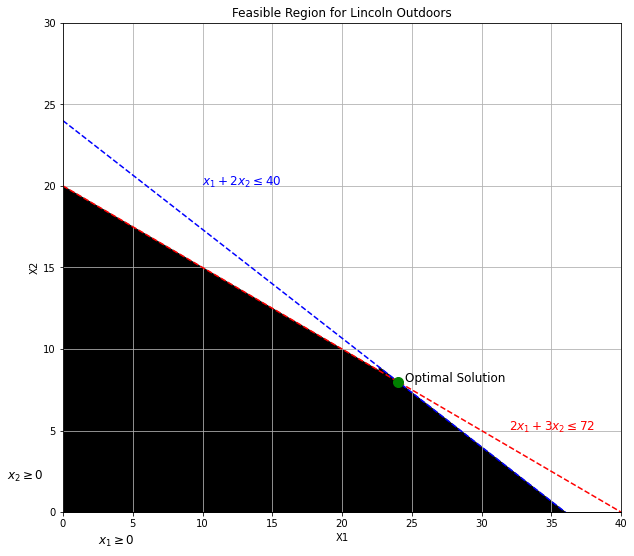

In [4]:
# x1 = the number of Cabin Model sleeping bags manufactured per day
# x2 = the number of Frontier Model sleeping bags manufactured per day
# P(x1, x2) is our objective function that we wish to optimize

#################### CONSTRAINTS ####################
# Cutting Department Constraints: x1 + 2x2 ≤ 40
# Assembly Department Constraints: 2x1 + 3x2 ≤ 72
# Non-Negativity Constraints: x1, x2 ≥ 0
# This is the function we want to maximize: P(x1,x2) = 60x1 + 90x2 => x2 = (-2/3)x1 + (K/90)

# Set functions for departmental constraints
def f1(x):
    return (40-x)/2
def f2(x):
    return (72-2*x)/3

# Use a symbolic variables in order to find the solution space
x = Symbol('x')
x1, =  solve(f1(x)-f2(x)) 
x2 = f1(x1)

# Get data for the linear equations
xr = np.linspace(0,40,100)
y1r = f1(xr)
y2r = f2(xr)

# Plot the linear equations and fill the feasible region
plt.figure(figsize=(10,9))
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Feasible Region for Lincoln Outdoors")
plt.xlabel("X1")
plt.ylabel("X2")
plt.plot(xr ,y1r, 'r--')
plt.plot(xr, y2r, 'b--')
# Plot a marker at the intersection
plt.plot(x1, x2, 'go', markersize=10)
plt.grid()
# Fill feasible region
plt.fill_between(xr, y2r, where=(y2r<9), color='#000000')
plt.fill_between(xr, y1r, where=(y1r>8), color='#000000')

# Add Text to Graph
ax.text(x1+0.5, x2, "Optimal Solution", size=12)
ax.text(10, 20, "$x_1 + 2x_2 \leq 40$", size=12, color="blue")
ax.text(32, 5, "$2x_1 + 3x_2 \leq 72$", size=12, color="red")
ax.text(-4, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -2, "$x_1 \geq 0$", size=12)

# Set limits in order to make the graph more digestible
plt.xlim(0,40)
plt.ylim(0,30)

# Show plot
plt.show()

<Figure size 720x648 with 0 Axes>

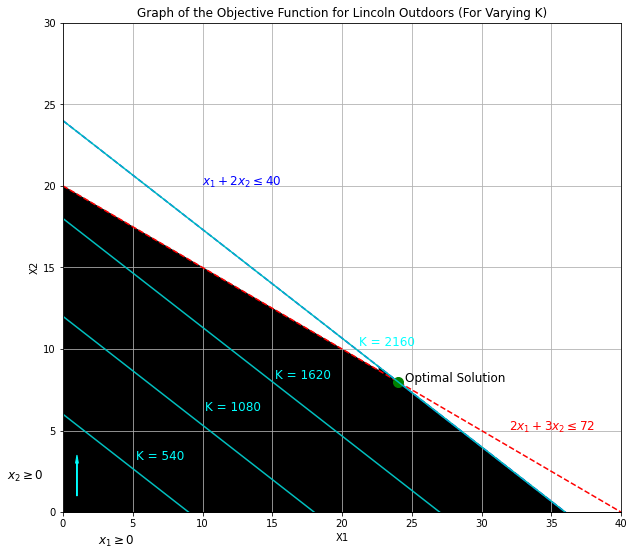

In [5]:
# x1 = the number of Cabin Model sleeping bags manufactured per day
# x2 = the number of Frontier Model sleeping bags manufactured per day
# P(x1, x2) is our objective function that we wish to optimize

#################### CONSTRAINTS ####################
# Cutting Department Constraints: x1 + 2x2 ≤ 40
# Assembly Department Constraints: 2x1 + 3x2 ≤ 72
# Non-Negativity Constraints: x1, x2 ≥ 0
# This is the function we want to maximize: P(x1,x2) = 60x1 + 90x2 => x2 = (-2/3)x1 + (K/90)

# Set functions for department constraints and potential profits
def f1(x):
    return (40-x)/2
def f2(x):
    return (72-2*x)/3
def f3(x,K):
    return (-2/3)*x+(K/90)

# Use a symbolic variables in order to find the solution space
x = Symbol('x')
x1, =  solve(f1(x)-f2(x))
x2 = f1(x1)

# Get data for the linear equations
xr = np.linspace(0,40,100)
y1r = f1(xr)
y2r = f2(xr)
# Where K is a fixed value to represent the profits
K1 = 540
slopeK1 = f3(xr,K1)
K2 = 1080
slopeK2 = f3(xr,K2)
K3 = 1620
slopeK3 = f3(xr,K3)
K4 = 2160
slopeK4 = f3(xr,K4)

# Plot the linear equations and fill the feasible region
plt.figure(figsize=(10,9))
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Graph of the Objective Function for Lincoln Outdoors (For Varying K)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.plot(xr ,y1r, 'r--')
plt.plot(xr, y2r, 'b--')
# Plot a marker at the intersection
plt.plot(x1, x2, 'go', markersize=10)
plt.plot(xr, slopeK1, 'c')
plt.plot(xr, slopeK2, 'c')
plt.plot(xr, slopeK3, 'c')
plt.plot(xr, slopeK4, 'c')
plt.grid()
plt.fill_between(xr, y2r, where=(y2r<9), color='#000000')
plt.fill_between(xr, y1r, where=(y1r>8), color='#000000')

# Add Text to Graph
ax.text(x1+0.5, x2, "Optimal Solution", size=12)
ax.text(10, 20, "$x_1 + 2x_2 \leq 40$", size=12, color="blue")
ax.text(32, 5, "$2x_1 + 3x_2 \leq 72$", size=12, color="red")
ax.text(-4, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -2, "$x_1 \geq 0$", size=12)
ax.text(5.2, 3.2, "K = 540", size=12, color="cyan")
ax.text(10.2, 6.2, "K = 1080", size=12, color="cyan")
ax.text(15.2, 8.2, "K = 1620", size=12, color="cyan")
ax.text(21.2, 10.2, "K = 2160", size=12, color="cyan")
ax.arrow(1, 1, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="cyan")

# Set limits in order to make the graph more digestible
plt.xlim(0,40)
plt.ylim(0,30)

# Show plot
plt.show()

<h4><font color="#D35400"><u>The Fundamental Theorem of Linear Programming:</u> If the optimal value of the objective function in a linear programming problem exists, then that value (known as the optimal solution) must occur at one or more of the corner points of the feasible region.</font></h4>

In [6]:
print("Corner Point (x1, x2) - P(x1, x2)")
print("     (0, 0)           -     0")
print("     (0, 20)          -    1800")
print("     (24, 8)          -    2160")
print("     (36, 0)          -    2160")

Corner Point (x1, x2) - P(x1, x2)
     (0, 0)           -     0
     (0, 20)          -    1800
     (24, 8)          -    2160
     (36, 0)          -    2160


<h3><font color="black">The Simplex Method: Maximization Problems with Problem Constraints of the form ≤</font></h3>

<h4><font color="black">Introducing Slack Variables</font></h4>

<h5><font color="black"><i><u>Slack Variables</u> are used to transform an inequality constraint into an equality. We will demonstrate the use of slack variables by adding them to the previous examples constraints.</i></font></h5>

In [7]:
# x1 = the number of Cabin Model sleeping bags manufactured per day
# x2 = the number of Frontier Model sleeping bags manufactured per day
# P(x1, x2) is our objective function that we wish to optimize

#################### CONSTRAINTS ####################
# Cutting Department Constraints: x1 + 2x2 + s1 = 40
# Assembly Department Constraints: 2x1 + 3x2 + s2 = 72
# Non-Negativity Constraints: x1, x2, s1, s2 ≥ 0
# This is the function we want to maximize: P(x1,x2) = 60x1 + 90x2 => x2 = (-2/3)x1 + (K/90)

# Tableau: This is the matrix form representing our linear programming problem.
# Below is our initial/canonical Simplex tableau. It contains a solution that is feasible.
# We are aware of our slack variables s1/s2 as well as our objective function P.
# Basic Variables: The variables represented by columns with exactly one nonzero entry (always a 1).
Ar1 = np.array(["(basic) ", "x1 ", "x2 ", "s1 ", "s2 ", "P ", ""])
Ar2 = np.array(["(s1)   ", " 1", "  2", "  1", "  0", "  0", " 40"])
Ar3 = np.array(["(s2)   ", " 2", "  3", "  0", "  1", "  0", " 72"])
Ar4 = np.array(["(P)   ", " -60", "-90", " 0",  "  0", "  1", "  0"])

print(*Ar1)
print(*Ar2)
print(*Ar3)
print(*Ar4)

# Note: We have five variables and three equations, thus we cannot directly solve for x
#print(np.linalg.solve(A, b))

(basic)  x1  x2  s1  s2  P  
(s1)     1   2   1   0   0  40
(s2)     2   3   0   1   0  72
(P)     -60 -90  0   0   1   0


<h4><font color="black">We have {s1, s2, P} as basic variables and {x1, x2} as nonbasic. Hence, this corresponds to the solution x1 = 0, x2 = 0, s1 = 40, s2 = 72, P = 0. Or, specifically, x1 = 0, x2 = 0, P = 0. </font></h4>

<h4><font color="black"><u>Selecting A Pivot Column:</u> To select the pivot column, choose the column with the largest negative entry in the bottom row. If there is a tie, choose either column. If there are no negative entries, we are done and an optimal solution has been found.<br><br></font> <font color="#1A5276">Example: Since the Frontiersman model produces the most per-unit profit, it seems reasonable that letting x2 be as large as possible will lead to maximizing the profit. x2 corresponds to the second column, this is our pivot column.</font></h4>

<h4><font color="black"><u>Selecting A Pivot Row:</u> To select the pivot row, choose the row with the smallest positive ratio of the entry in the last column divided by the corresponding entry in the pivot column. If there is a tie, choose either row. If there are no positive entries in the pivot column above the last row, the linear program has no optimal solution and we are done.<br><br></font> <font color="#1A5276">Example: The cutting department only has 40 labor-hours available which means they can cut for at most 20 sleeping bags. The assembly department has only 72 labor-hours available, so they can assemble at most 24 sleeping bags. Hence we have the restriction that we can make at most 20 Frontiersman models of the sleeping bag in a single day. Hence, we choose the first row
as the pivot row.</font></h4>

<h4><font color="black"><u>Pivot Operations:</u><br><br>• Multiply the pivot row by the reciprocal of the pivot element. This transforms the pivot element into a 1. Symbolically, if k is the pivot element and Rt is the pivot row: (1/k)*Rt → Rt.<br><br>• Add multiples of the pivot row to all other rows in the tableau in order to annihilate (transform to 0) all other entries in the pivot column. Symbolically, something like c*Rs + Rt → Rt.<br><br>Note: We refer to the element of the tableau that is in the pivot row and the pivot column as the pivot element.</font></h4>

In [8]:
# Functions for pivot operations
def PivotOp1(A,K,r):
    A[r] = (K*A[r])
    return A

def PivotOp2(A,c,s,t):
    A[t] = (c*A[s]+A[t])
    return A

# Initialize variables and print out initial Simplex tableau
A = np.array([[1.0, 2.0, 1.0, 0.0, 0.0, 40.0], [2.0, 3.0, 0.0, 1.0, 0.0, 72.0], [-60.0, -90.0, 0.0, 0.0, 1.0, 0.0]])
print("A Matrix:")
print(A)
# Pivot Element
K = 1/2
r1=0
r2=1
r3=2
# Supress scientific notation in order to make the matrix operations clearer
np.set_printoptions(suppress=True)

# Perform our first pivot operation and display
B = PivotOp1(A,K,r1)
print("\nB Matrix:")
print(B)

# Perform our second pivot operation and display
C = PivotOp2(B,-3,r1,r2)
print("\nC Matrix:")
print(C)

# Perform our third pivot operation and display
D = PivotOp2(C,90,r1,r3)
print("\nD Matrix:")
print(D)

print("\nObserve that we now have that the basic variables are given by the set {x2, s2, P} and the non-basic variables are {x1, s1}. It is also worthwhile to point out that we currently have x1 = 0 (since it is currently a non-basic variable) and x2 = 20.  This corresponds to a corner point in the graph of the feasible solution and, in fact, the Simplex Method after one \niteration has moved us from the origin to the point (0, 20) where P has increased from $0 to $1800.")

# Perform our fourth pivot operation and display
E = PivotOp1(D,1/K,r2)
print("\nE Matrix:")
print(E)


# Perform our fifth pivot operation and display
F = PivotOp2(E,-K,r2,r1)
print("\nF Matrix:")
print(F)


# Perform our sixth pivot operation and display
G = PivotOp2(F,15,r2,r3)
print("\nG Matrix:")
print(G)

A Matrix:
[[  1.   2.   1.   0.   0.  40.]
 [  2.   3.   0.   1.   0.  72.]
 [-60. -90.   0.   0.   1.   0.]]

B Matrix:
[[  0.5   1.    0.5   0.    0.   20. ]
 [  2.    3.    0.    1.    0.   72. ]
 [-60.  -90.    0.    0.    1.    0. ]]

C Matrix:
[[  0.5   1.    0.5   0.    0.   20. ]
 [  0.5   0.   -1.5   1.    0.   12. ]
 [-60.  -90.    0.    0.    1.    0. ]]

D Matrix:
[[   0.5    1.     0.5    0.     0.    20. ]
 [   0.5    0.    -1.5    1.     0.    12. ]
 [ -15.     0.    45.     0.     1.  1800. ]]

Observe that we now have that the basic variables are given by the set {x2, s2, P} and the non-basic variables are {x1, s1}. It is also worthwhile to point out that we currently have x1 = 0 (since it is currently a non-basic variable) and x2 = 20.  This corresponds to a corner point in the graph of the feasible solution and, in fact, the Simplex Method after one 
iteration has moved us from the origin to the point (0, 20) where P has increased from $0 to $1800.

E Matrix:
[[   0.

<h4><font color="black">Verification: Table For Comparison.</font></h4>

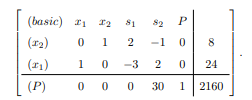

<h4><font color="#1A5276">Therefore we have found that producing 8 Cabin Model Sleeping Bags (x1) and 24 Frontier Model Sleeping Bags (x2) is the optimal solution. We know this because there are no longer negative entries in the bottom row.</font></h4>

<h4><font color="black"><i><u>The Simplex Method</u> is designed in such a way that as long as the method begins at a feasible solution (hence the importance of the initial simplex tableau over just a tableau), the algorithm will efficiently move from corner point to corner point until it terminates at the optimal value. This is important because it guarantees</i><br><br>
1. The process always terminates.<br>
    2. The process always produces a feasible solution.</font></h4>


<h3><font color="black">The Dual: Minimization with Problem Constraints of the form ≥</font></h3>

<h4><font color="black">Instead of maximizing a particular objective function, let us are now consider a situation where we want to minimize an objective function, e.g. minimizing costs.</font></h4>

In [9]:
#################### CONSTRAINTS ####################
# Minimize:   C(y1, y2) = 40y1 + 72y2
# Subject to: y1 + 2y2 ≥ 60 
#             2y1 + 3y2 ≥ 90 
#             y1, y2 ≥ 0

# Initialize variables and print out initial Simplex tableau
A = np.array([[1.0, 2.0, 60.0], [2.0, 3.0, 90.0], [40.0, 72.0, 0.0]])
print("A Matrix:")
print(A)
print("\n")
print("A^T Matrix:")
# TRANSPOSE!
print(A.transpose())

#################### CONSTRAINTS ####################
# Maximize:   P(x1,x2) = 60x1 + 90x2
# Subject to: x1 + 2x2 ≤ 40
#             2x1 + 3x2 ≤ 72
#             x1, x2 ≥ 0
# These constraints resemble our previous problem

# Adding slack variables, we get the form
Ar1 = np.array(["(basic) ", "x1 ", "x2 ", "y1 ", "y2 ", "P ", ""])
Ar2 = np.array(["(y1)   ", " 1", "  2", "  1", "  0", "  0", " 40"])
Ar3 = np.array(["(y2)   ", " 2", "  3", "  0", "  1", "  0", " 72"])
Ar4 = np.array(["(P)   ", " -60", "-90", " 0",  "  0", "  1", "  0"])

print("\n")
print(*Ar1)
print(*Ar2)
print(*Ar3)
print(*Ar4)
print("\n")

# Functions for pivot operations
def PivotOp1(A,K,r):
    A[r] = (K*A[r])
    return A

def PivotOp2(A,c,s,t):
    A[t] = (c*A[s]+A[t])
    return A

# Initialize variables and print out initial Simplex tableau
A = np.array([[1.0, 2.0, 1.0, 0.0, 0.0, 40.0], [2.0, 3.0, 0.0, 1.0, 0.0, 72.0], [-60.0, -90.0, 0.0, 0.0, 1.0, 0.0]])
print("A Matrix:")
print(A)
# Pivot Element
K = 1/2
r1=0
r2=1
r3=2
# Supress scientific notation in order to make the matrix operations clearer
np.set_printoptions(suppress=True)

# Perform our first pivot operation and display
B = PivotOp1(A,K,r1)
print("\nB Matrix:")
print(B)

# Perform our second pivot operation and display
C = PivotOp2(B,-3,r1,r2)
print("\nC Matrix:")
print(C)

# Perform our third pivot operation and display
D = PivotOp2(C,90,r1,r3)
print("\nD Matrix:")
print(D)

# Perform our fourth pivot operation and display
E = PivotOp1(D,1/K,r2)
print("\nE Matrix:")
print(E)


# Perform our fifth pivot operation and display
F = PivotOp2(E,-K,r2,r1)
print("\nF Matrix:")
print(F)


# Perform our sixth pivot operation and display
G = PivotOp2(F,15,r2,r3)
print("\nG Matrix:")
print(G)

A Matrix:
[[ 1.  2. 60.]
 [ 2.  3. 90.]
 [40. 72.  0.]]


A^T Matrix:
[[ 1.  2. 40.]
 [ 2.  3. 72.]
 [60. 90.  0.]]


(basic)  x1  x2  y1  y2  P  
(y1)     1   2   1   0   0  40
(y2)     2   3   0   1   0  72
(P)     -60 -90  0   0   1   0


A Matrix:
[[  1.   2.   1.   0.   0.  40.]
 [  2.   3.   0.   1.   0.  72.]
 [-60. -90.   0.   0.   1.   0.]]

B Matrix:
[[  0.5   1.    0.5   0.    0.   20. ]
 [  2.    3.    0.    1.    0.   72. ]
 [-60.  -90.    0.    0.    1.    0. ]]

C Matrix:
[[  0.5   1.    0.5   0.    0.   20. ]
 [  0.5   0.   -1.5   1.    0.   12. ]
 [-60.  -90.    0.    0.    1.    0. ]]

D Matrix:
[[   0.5    1.     0.5    0.     0.    20. ]
 [   0.5    0.    -1.5    1.     0.    12. ]
 [ -15.     0.    45.     0.     1.  1800. ]]

E Matrix:
[[   0.5    1.     0.5    0.     0.    20. ]
 [   1.     0.    -3.     2.     0.    24. ]
 [ -15.     0.    45.     0.     1.  1800. ]]

F Matrix:
[[   0.    1.    2.   -1.    0.    8.]
 [   1.    0.   -3.    2.    0.   24.]
 [ -15.

<h4><font color="black">Verification: Table For Comparison. (I solved it slightly differently, so there is a minor difference in output.)</font></h4>

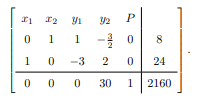

 <h4><font color="#1A5276">An optimal solution to a minimization problem is obtained from the bottom row of the final simplex tableau for the dual maximization problem. In other words, y1 = 0 and y2 = 30 minimizes C(y1, y2) = 60y1 + 90y2 under the stated constraints.</font></h4>

 <h4><font color="#D35400"><u>The Fundamental Principle of Duality:</u> A minimization problem has a solution if and only if the corresponding dual maximization problem has a solution.</font></h4>

<h3><font color="black">The Big M Method: Maximum and Minimization Problems with Mixed Constraints (≥, ≤, or =)</font></h3>

In [10]:
#################### CONSTRAINTS ####################
# Maximize:   P(x1, x2) = 2x1 + x2 
# Subject to: x1 + x2 ≤ 10 
#            −x1 + x2 ≥ 2 
#             x1, x2 ≥ 0

# Introduce slack variables
# x1 + x2 + s1 = 10
# −x1 + x2 − s2 = 2

# Therefore we have the matrix
Ar1 = np.array(["(basic) ", "x1 ", "x2 ", "s1 ", "s2 ", "P ", ""])
Ar2 = np.array(["(s1)   ", " 1", "  1", "  1", "  0", "  0", " 10"])
Ar3 = np.array(["(s2)  ", " -1", "  1", "  0", " -1", "  0", " 2"])
Ar4 = np.array(["(P)   ", " -2", " -1", "  0",  "  0", "  1", " 0"])

print(*Ar1)
print(*Ar2)
print(*Ar3)
print(*Ar4)

(basic)  x1  x2  s1  s2  P  
(s1)     1   1   1   0   0  10
(s2)    -1   1   0  -1   0  2
(P)     -2  -1   0   0   1  0


<h4><font color="black">This has the basic solution: x1 = 0, x2 = 0, s1 = 10, s2 = −2 <br><br> But, s2 fails the non-negativity constraint! So, we introduce the articial variable a1 (this will not be part of our optimal solution).<br><br> We now have: −x1 + x2 − s2 + a1 = 2 <br><br> And the objective function becomes, P(x1, x2) = 2x1 + x2 − Ma1 <br><br> Where M is an arbitrary value which introduces a large penalty if a1 is anything other than zero. Hence, the name "The Big M Method".</font></h4>

In [11]:
#################### MODIFIED CONSTRAINTS ####################
# Maximize:   P(x1, x2) = 2x1 + x2 − M*a1 
# Subject to: x1 + x2 + s1 = 10 
#            −x1 + x2 − s2 + a2 = 2 
#             x1, x2, s1, s2, a1 ≥ 0


# Introduce surplus variable
#(similiar to a slack variable but helps make up the difference since we have a greater than inequality)
# Therefore we have the matrix
Ar1 = np.array(["(basic) ", "x1 ", "x2 ", "s1 ", "s2 ", "a1 ", "P ", ""])
Ar2 = np.array(["(s1)   ", " 1", "  1", "  1", "  0", "  0", "  0", " 10"])
Ar3 = np.array(["(s2)  ", " -1", "  1", "  0", " -1", "  1", "  0", " 2"])
Ar4 = np.array(["(P)   ", " -2", " -1", "  0",  "  0", "  M", "  1", " 0"])

print(*Ar1)
print(*Ar2)
print(*Ar3)
print(*Ar4)

(basic)  x1  x2  s1  s2  a1  P  
(s1)     1   1   1   0   0   0  10
(s2)    -1   1   0  -1   1   0  2
(P)     -2  -1   0   0   M   1  0


In [12]:
# Functions for pivot operations
def PivotOp1(A,K,r):
    A[r] = (K*A[r])
    return A

def PivotOp2(A,c,s,t):
    A[t] = (c*A[s]+A[t])
    return A

# Use a symbolic variables in order to find the solution space
M = Symbol('M')

# Initialize variables and print matrix
A = np.array([[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 10.0], [-1.0, 1.0, 0.0, -1.0, 1.0, 0.0, 2.0], [-2.0, -1.0, 0.0, 0.0, M, 1.0, 0.0]])
print("A Matrix:")
print(A)
# Pivot Element
K = 1
r1=0
r2=1
r3=2
# Supress scientific notation in order to make the matrix operations clearer
np.set_printoptions(suppress=True)

# Perform our first pivot operation and display, this is now feasible with a basic solution
B = PivotOp2(A,-M,r2,r3)
print("\nB Matrix:")
print(B)

# We find that column 2 is our pivot column, row 2 is our pivot row and our pivot element is 1
# Now that that is determined, we can delete our surplus variable a1, we find matrix below 
B1 = np.array([[1.0, 1.0, 1.0, 0.0, 0.0, 10.0], [-1.0, 1.0, 0.0, -1.0, 0.0, 2.0], [-3.0, 0.0, 0.0, -1.0, 1.0, 2]])
print("\nB1 Matrix:")
print(B1)

# Perform our second pivot operation and display
C = PivotOp2(B1,-K,r2,r1)
print("\nC Matrix:")
print(C)

# Perform our third pivot operation and display
D = PivotOp1(C,K/2,r1)
print("\nD Matrix:")
print(D)

# Perform our fourth pivot operation and display
E = PivotOp2(D,K,r1,r2)
print("\nE Matrix:")
print(E)

# Perform our fifth pivot operation and display
F = PivotOp2(E,3,r1,r3)
print("\nE Matrix:")
print(F)

A Matrix:
[[1.0 1.0 1.0 0.0 0.0 0.0 10.0]
 [-1.0 1.0 0.0 -1.0 1.0 0.0 2.0]
 [-2.0 -1.0 0.0 0.0 M 1.0 0.0]]

B Matrix:
[[1.0 1.0 1.0 0.0 0.0 0.0 10.0]
 [-1.0 1.0 0.0 -1.0 1.0 0.0 2.0]
 [1.0*M - 2.0 -1.0*M - 1.0 0 1.0*M 0 1.00000000000000 -2.0*M]]

B1 Matrix:
[[ 1.  1.  1.  0.  0. 10.]
 [-1.  1.  0. -1.  0.  2.]
 [-3.  0.  0. -1.  1.  2.]]

C Matrix:
[[ 2.  0.  1.  1.  0.  8.]
 [-1.  1.  0. -1.  0.  2.]
 [-3.  0.  0. -1.  1.  2.]]

D Matrix:
[[ 1.   0.   0.5  0.5  0.   4. ]
 [-1.   1.   0.  -1.   0.   2. ]
 [-3.   0.   0.  -1.   1.   2. ]]

E Matrix:
[[ 1.   0.   0.5  0.5  0.   4. ]
 [ 0.   1.   0.5 -0.5  0.   6. ]
 [-3.   0.   0.  -1.   1.   2. ]]

E Matrix:
[[ 1.   0.   0.5  0.5  0.   4. ]
 [ 0.   1.   0.5 -0.5  0.   6. ]
 [ 0.   0.   1.5  0.5  1.  14. ]]


<h4><font color="black">Verification: Table For Comparison. (I solved it slightly differently, so there is a minor difference in output.)</font></h4>

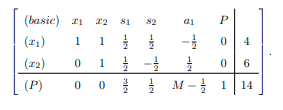

<h4><font color="black">Recall, the bottom row now consists of all positive numbers so we terminate the process. Thus, we have found an optimal solution of x1 = 4, x2 = 6, and P = 14 at its maximum.</font></h4>

<h3><font color="black">Minimization Problems with the Big M Method</font></h3>

In [13]:
#################### CONSTRAINTS ####################
# Maximize:   P(x1, x2) = 5x1 + 3x2 
# Subject to: 3x1 + 4x2 ≥ 12
#             2x1 + 5x2 ≤ 20 
#             x1, x2 ≥ 0

# Introduce slack variables
# 3x1 + 4x2 - s1 = 12
# 2x1 + 5x2 + s2 = 20

# Therefore we have the matrix
Ar1 = np.array(["(basic) ", "x1 ", "x2 ", "s1 ", "s2 ", "P ", ""])
Ar2 = np.array(["(s1)   ", " 3", "  4", "  -1", "  0", "  0", " 12"])
Ar3 = np.array(["(s2)  ", "  2", "  5", "   0", "  1", "  0", " 20"])
Ar4 = np.array(["(P)   ", "  5", "  3", "   0",  "  0", "  1", " 0"])

print(*Ar1)
print(*Ar2)
print(*Ar3)
print(*Ar4)

(basic)  x1  x2  s1  s2  P  
(s1)     3   4   -1   0   0  12
(s2)     2   5    0   1   0  20
(P)      5   3    0   0   1  0


<h4><font color="black">This has the basic solution: x1 = 0, x2 = 0, a1 = 0, s1 = -12, s2 = 20 <br><br> But, s1 fails the non-negativity constraint! So, we introduce the articial variable a1 (this will not be part of our optimal solution).<br><br> We now have: 3x1 + 4x2 − s1 + a1 = 12 <br><br> And the objective function becomes, P(x1, x2) = 5x1 + 3x2 + Ma1 <br><br> Again, where M is an arbitrary value which introduces a large penalty if a1 is anything other than zero. Hence, the name "The Big M Method".</font></h4>

In [14]:
#################### MODIFIED CONSTRAINTS ####################
# Maximize:   P(x1, x2) = 5x1 + 3x2 + M*a1 
# Subject to: 3x1 + 4x2 - s1 + a1 = 12 
#             2x1 + 5x2 + s2 = 20 
#             x1, x2, s1, s2, a1 ≥ 0


# Introduce surplus variable
#(similiar to a slack variable but helps make up the difference since we have a greater than inequality)
# Therefore we have the matrix
Ar1 = np.array(["(basic) ", "x1 ", "x2 ", "s1 ", "s2 ", "a1 ", "P ", ""])
Ar2 = np.array(["(s1)   ", " 3", "  4", " -1", "  0", "  1", "  0", " 12"])
Ar3 = np.array(["(s2)  ", "  2", "  5", "  0", "  1", "  0", "  0", " 20"])
Ar4 = np.array(["(P)   ", "  5", "  3", "  0",  "  0", "  M", "  1", " 0"])

print(*Ar1)
print(*Ar2)
print(*Ar3)
print(*Ar4)

(basic)  x1  x2  s1  s2  a1  P  
(s1)     3   4  -1   0   1   0  12
(s2)     2   5   0   1   0   0  20
(P)      5   3   0   0   M   1  0


In [15]:
# Functions for pivot operations
def PivotOp1(A,K,r):
    A[r] = (K*A[r])
    return A

def PivotOp2(A,c,s,t):
    A[t] = (c*A[s]+A[t])
    return A

# Use a symbolic variables in order to find the solution space
M = Symbol('M')

# Initialize variables and print matrix
A = np.array([[3.0, 4.0, -1.0, 0.0, 1.0, 0.0, 12.0], [2.0, 5.0, 0.0, 1.0, 0.0, 0.0, 20.0], [5.0, 3.0, 0.0, 0.0, M, 1.0, 0.0]])
print("A Matrix:")
print(A)
# Pivot Element
K = 1
r1=0
r2=1
r3=2
# Supress scientific notation in order to make the matrix operations clearer
np.set_printoptions(suppress=True)

# Perform our first pivot operation and display, this is now feasible with a basic solution
B = PivotOp2(A,-M,r1,r3)
print("\nB Matrix:")
print(B)

# Perform our second pivot operation and display
C = PivotOp2(B,-5/4,r1,r2)
print("\nD Matrix:")
print(C)

# Perform our third pivot operation and display
D = PivotOp2(C,(4*M-3)/4,r1,r3)
print("\nE Matrix:")
print(D)

# Perform our fourth pivot operation and display
E = PivotOp1(D,1/4,r1)
print("\nC Matrix:")
print(E)

A Matrix:
[[3.0 4.0 -1.0 0.0 1.0 0.0 12.0]
 [2.0 5.0 0.0 1.0 0.0 0.0 20.0]
 [5.0 3.0 0.0 0.0 M 1.0 0.0]]

B Matrix:
[[3.0 4.0 -1.0 0.0 1.0 0.0 12.0]
 [2.0 5.0 0.0 1.0 0.0 0.0 20.0]
 [5.0 - 3.0*M 3.0 - 4.0*M 1.0*M 0 0 1.00000000000000 -12.0*M]]

D Matrix:
[[3.0 4.0 -1.0 0.0 1.0 0.0 12.0]
 [-1.75 0.0 1.25 1.0 -1.25 0.0 5.0]
 [5.0 - 3.0*M 3.0 - 4.0*M 1.0*M 0 0 1.00000000000000 -12.0*M]]

E Matrix:
[[3.0 4.0 -1.0 0.0 1.0 0.0 12.0]
 [-1.75 0.0 1.25 1.0 -1.25 0.0 5.0]
 [2.75000000000000 0 0.750000000000000 0 1.0*M - 0.75 1.00000000000000
  -9.00000000000000]]

C Matrix:
[[0.75 1.0 -0.25 0.0 0.25 0.0 3.0]
 [-1.75 0.0 1.25 1.0 -1.25 0.0 5.0]
 [2.75000000000000 0 0.750000000000000 0 1.0*M - 0.75 1.00000000000000
  -9.00000000000000]]


<h4><font color="black">Verification: Table For Comparison. (I solved it slightly differently, so there is a minor difference in output.)</font></h4>

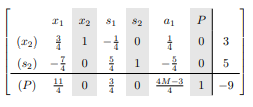

<h4><font color="black">Since there are no negative entries in the columns involving the variables, the process terminates and
we see that max P = −C − 9. Therefore, the minimum is C = 9 and this occurs at x1 = 0, x2 = 3.</font></h4>

<h2><font color="black">Integer Linear Programming</font></h2>

<h4><font color="black">This next method is specific to integer linear programming. It is not always realistic to have fractional solutions to your problem, nor is it optimal.</font></h4>

<h3><font color="black">Dakin’s Branch and Bound</font></h3>

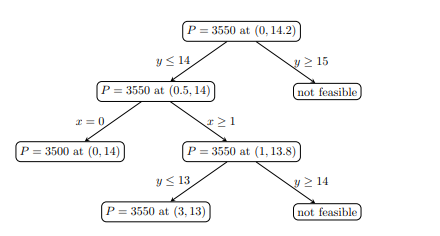

<h4><font color="#943126">Example Problem</font></h4>

<h5><font color="#943126">Anna’s Cozy Home Furnishings (ACHF) handcrafts two kinds of quality hardwood tables for local
furniture stores. The company offers a simple Farmhouse model and an elegant Designer model. It
takes 1 labor-hour to cut each Farmhouse model whereas each Designer table takes 2 labor-hours to
cut. Assembly and finishing time for the Farmhouse model is 3 labor-hours and 5 for the Designer.
ACHF assembles and finishes the tables and has a total of 71 labor-hours available per week but
contracts the cutting externally and by contract must place an order requiring at least 30 hours per
week of cutting. ACHF rents its assembly and finishing facility to another company on the weekends
and, as such, they can leave no materials or unfinished tables on site. ACHF makes a profit of $100
per farmhouse table sold and $250 per designer model. Assuming all tables ACHF produces will sell,
what should ACHF weekly production be in order to maximize profit?</font></h5>

In [16]:
#################### CONSTRAINTS ####################
# Assembly and Finishing Constraint: 2x1 + 5x2 ≤ 71
# Cutting Constraint: x1 + 3x2 ≥ 30
# Non-Negativity Constraints: x1, x2 ≥ 0
# This is the function we want to maximize: P(x1,x2) = 100x1 + 250x2 => x2 = (-2/5)x1 + (K/250)

#################### MODIFIED CONSTRAINTS ####################
# Maximize:   P(x1, x2) = 2x1 + 5x2 - M*a1 
# Subject to: 2x1 + 5x2 + s1 = 71
#             x1 + 3x2 - s2 + a1 = 30
#             x1, x2, s1, s2, a1 ≥ 0

# Therefore we have the matrix
Ar1 = np.array(["(basic) ", "x1 ", "x2 ", "s1 ", "s2 ", "a1 ", "P ", ""])
Ar2 = np.array(["(s1)   ", " 2", "  5", "  1", "  0", "  0", "  0", " 71"])
Ar3 = np.array(["(s2)  ", "  1", "  3", "  0", " -1", "  1", "  0", " 30"])
Ar4 = np.array(["(P)   ", "-100", "-250", "0",  "  0", "  M", "  1", " 0"])

print(*Ar1)
print(*Ar2)
print(*Ar3)
print(*Ar4)

(basic)  x1  x2  s1  s2  a1  P  
(s1)     2   5   1   0   0   0  71
(s2)     1   3   0  -1   1   0  30
(P)    -100 -250 0   0   M   1  0


<h5><font color="#D35400">Dakin’s branch and bound algorithm for ILP.<br><br>
Input: LP problem to be solved over the integers.<br><br>
1: Solve the linear programming problem over the real numbers.<br><br>
2: Identify a decision variable xi whose solution is a non-integer value bi.<br><br>
3: Branch the LP problem into two new problems by introducing into one subproblem the constraint xi ≤ [bi] and into the other subproblem introduce the constraint xi ≥ [bi].<br><br>
4: Solve each branch as an LP problem over the reals. If either has a lattice point as its solution, stop. Else repeat step 1 for both branches.<br><br>
Output: A local solution for an Integer Linear Programming problem.</font></h5>

<h5><font color="black">1: Solve the linear programming problem over the real numbers.</font></h5>

In [17]:
# Functions for pivot operations
def PivotOp1(A,K,r):
    A[r] = (K*A[r])
    return A

def PivotOp2(A,c,s,t):
    A[t] = (c*A[s]+A[t])
    return A

# Use a symbolic variables in order to find the solution space
M = Symbol('M')

# Initialize variables and print matrix
A = np.array([[2.0, 5.0, 1.0, 0.0, 0.0, 0.0, 71.0], [1.0, 3.0, 0.0, -1.0, 1.0, 0.0, 30.0], [-100.0, -250.0, 0.0, 0.0, M, 1.0, 0.0]])
print("A Matrix:")
print(A)
# Pivot Element
K = 3
r1=0
r2=1
r3=2
# Supress scientific notation in order to make the matrix operations clearer
np.set_printoptions(suppress=True)

# Perform our first pivot operation and display, this is now feasible with a basic solution
B = PivotOp2(A,-M,r2,r3)
print("\nB Matrix:")
print(B)

# We find that column 2 is our pivot column, row 2 is our pivot row and our pivot element is 3
# Now that that is determined, we can delete our surplus variable a1, we find matrix below 
B1 = np.array([[2.0, 5.0, 1.0, 0.0, 0.0, 71.0], [1.0, 3.0, 0.0, -1.0, 0.0, 30.0], [-50/3, 0.0, 0.0, -250/3.0, 1.0, 2500.0]])
print("\nB1 Matrix:")
print(B1)

# Perform our second pivot operation and display
C = PivotOp1(B1,1/K,r2)
print("\nC Matrix:")
print(C)

# Perform our third pivot operation and display
D = PivotOp2(C,-5,r2,r1)
print("\nD Matrix:")
print(D)

# Perform our fourth pivot operation and display
E = PivotOp1(D,3/5,r1)
print("\nE Matrix:")
print(E)

# Perform our fifth pivot operation and display
F = PivotOp2(E,1/K,r1,r2)
print("\nE Matrix:")
print(F)

# Perform our sixth pivot operation and display
G = PivotOp2(F,250/K,r1,r3)
print("\nG Matrix:")
print(G)

A Matrix:
[[2.0 5.0 1.0 0.0 0.0 0.0 71.0]
 [1.0 3.0 0.0 -1.0 1.0 0.0 30.0]
 [-100.0 -250.0 0.0 0.0 M 1.0 0.0]]

B Matrix:
[[2.0 5.0 1.0 0.0 0.0 0.0 71.0]
 [1.0 3.0 0.0 -1.0 1.0 0.0 30.0]
 [-1.0*M - 100.0 -3.0*M - 250.0 0 1.0*M 0 1.00000000000000 -30.0*M]]

B1 Matrix:
[[   2.            5.            1.            0.            0.
    71.        ]
 [   1.            3.            0.           -1.            0.
    30.        ]
 [ -16.66666667    0.            0.          -83.33333333    1.
  2500.        ]]

C Matrix:
[[   2.            5.            1.            0.            0.
    71.        ]
 [   0.33333333    1.            0.           -0.33333333    0.
    10.        ]
 [ -16.66666667    0.            0.          -83.33333333    1.
  2500.        ]]

D Matrix:
[[   0.33333333    0.            1.            1.66666667    0.
    21.        ]
 [   0.33333333    1.            0.           -0.33333333    0.
    10.        ]
 [ -16.66666667    0.            0.          -83.33333333   

<h4><font color="black">Recall, the bottom row now consists of all positive numbers so we terminate the process. Thus, we have found an optimal solution of x1 = 12.6, x2 = 14.2, and P = 3550 at its maximum. Now we move to step 2 of the algorithm.</font></h4>

<h5><font color="black">2: Identify a decision variable xi whose solution is a non-integer value bi.<br><br> We pick variable x2 to begin branching, then we can branch based off of constraints given by x1.</font></h5>

<h5><font color="black">3: Branch the LP problem into two new problems by introducing into one subproblem the constraint xi ≤ [bi] and into the other subproblem introduce the constraint xi ≥ [bi].<br><br> Since x2 = 14.2, we will branch for integer bounds x2 greater than or equal to 15 and x2 less than or equal to 15.</font></h5>

In [18]:
#################### CONSTRAINTS ####################
# Assembly and Finishing Constraint: 2x1 + 5x2 ≤ 71
# Cutting Constraint: x1 + 3x2 ≥ 30
# Non-Negativity Constraints: x1, x2 ≥ 0
# This is the function we want to maximize: P(x1,x2) = 100x1 + 250x2 => x2 = (-2/5)x1 + (K/250)
# Set functions for departmental constraints

def f1(x):
    return (71-2*x)/5
def f2(x):
    return (30-x)/3
def f3(x):
    return (71-5*x)/2
def f4(x):
    return (30-3*x)
def f5(x,K):
    return (-2/5)*x+(K/250)

# Use a symbolic variables in order to find the solution space
x = Symbol('x')
temp1 = f3(0)
temp2 = f4(0)

# These loops print out the output to functions 3 and 4, we can observe the minimized output at the terminal
# If the output is negative, it is not feasible


# This loop branchs and checks minimized solutions for x2 <= 14
# For this loop we find P = 3550 at (0.5, 14)
for i in range(15):
    min1 = f3(i)
    min2 = f4(i)
    
    if(temp1 <= min1):
        min1 = temp1
    if(temp2 <= min2):
        min2 = temp2
#     if(min1 < 0):
#         print("Minimum 1 Not Feasible")
#     if(min2 < 0):
#         print("Minimum 2 Not Feasible")
        
    temp1 = min1
    temp2 = min2
    
    # Selectively printing the output right now for readability purposes
    if(i == 14):
        print("Index: " ,i)
        print("min1: " , min1)
        print("min2: " , min2)
        print("\n")

# This loop branchs and checks minimized solutions for x2 >= 15
# For this loop we find no feasible outputs, no further exploration needed
for i in range(15, 50):
    min1 = f3(i)
    min2 = f4(i)
    
    if(temp1 <= min1):
        min1 = temp1
    if(temp2 <= min2):
        min2 = temp2
#     if(min1 < 0):
#         print("Minimum 1 Not Feasible")
#     if(min2 < 0):
#         print("Minimum 2 Not Feasible")
        
    temp1 = min1
    temp2 = min2

# Not printing to terminal, but you are more than welcome to check non-feasible output
#     print("Index: " ,i)
#     print("min1: " , min1)
#     print("min2: " , min2)
#     print("\n")

Index:  14
min1:  0.5
min2:  -12




<h5><font color="black">4: Solve each branch as an LP problem over the reals. If either has a lattice point as its solution, stop. Else repeat step 1 for both branches.<br><br>No lattice point, go to step one. Note: A lattice point is a point in a Cartesian coordinate system such that both its $x$- and $y$-coordinates are integers. </font></h5>

<h5><font color="black">1: Solve the linear programming problem over the real numbers.</font></h5>

<h5><font color="black">2: Identify a decision variable xi whose solution is a non-integer value bi.<br><br> We pick variable x1 to continue branching, then we can branch again based off of constraints given by x2.</font></h5>

<h5><font color="black">3: Branch the LP problem into two new problems by introducing into one subproblem the constraint xi ≤ [bi] and into the other subproblem introduce the constraint xi ≥ [bi].<br><br> Since x1 = 0.5 and x2 = 14, we will branch for integer bounds x1 greater than or equal to 1 and x1 equal to 0.</font></h5>

In [19]:
#################### CONSTRAINTS ####################
# Assembly and Finishing Constraint: 2x1 + 5x2 ≤ 71
# Cutting Constraint: x1 + 3x2 ≥ 30
# Non-Negativity Constraints: x1, x2 ≥ 0
# This is the function we want to maximize: P(x1,x2) = 100x1 + 250x2 => x2 = (-2/5)x1 + (K/250)
# Set functions for departmental constraints

def f1(x):
    return (71-2*x)/5
def f2(x):
    return (30-x)/3
def f3(x):
    return (71-5*x)/2
def f4(x):
    return (30-3*x)
def f5(x1,x2):
    return 100*x1 + 250*x2

# Use a symbolic variables in order to find the solution space
x = Symbol('x')

# This is the branch to check x1 = 0 and x2 = 14
# We find P = 3500 at (0, 14)
max0 = f5(0, 14)
print("max0: ", max0)
print("\n")

# This loop prints out the output to functions 1 and 2, we can observe the maximized output at the terminal
# This loop branchs and checks maximized solutions for x1 >= 1
# For this loop we find P = 3550 at (1, 13.8)
for i in range(10):
    min1 = f1(i)
    min2 = f2(i)
    
    max1 = f5(i, min1)
    max2 = f5(i, min2)
    
    # Selectively printing the output right now for readability purposes
    if(i == 1):
        print("Index: " ,i)
        print("min1: " , min1)
        print("min2: " , min2)
        print("max1: " , max1)
        print("max2: " , max2)
        print("\n")

max0:  3500


Index:  1
min1:  13.8
min2:  9.666666666666666
max1:  3550.0
max2:  2516.6666666666665




<h5><font color="black">4: Solve each branch as an LP problem over the reals. If either has a lattice point as its solution, stop. Else repeat step 1 for both branches.<br><br>There is a lattice point at x1 = 0, stop that branch. No lattice point for x1 >= 1, go to step one. Note: A lattice point is a point in a Cartesian coordinate system such that both its $x$- and $y$-coordinates are integers. </font></h5>

<h5><font color="black">1: Solve the linear programming problem over the real numbers.</font></h5>

<h5><font color="black">2: Identify a decision variable xi whose solution is a non-integer value bi.<br><br> We pick variable x2 to continue (finish?!?) branching.</font></h5>

<h5><font color="black">3: Branch the LP problem into two new problems by introducing into one subproblem the constraint xi ≤ [bi] and into the other subproblem introduce the constraint xi ≥ [bi].<br><br> Since x1 = 1 and x2 = 13.8, we will branch for integer bounds x2 greater than or equal to 14 and x2 less than or equal to 13.</font></h5>

In [20]:
#################### CONSTRAINTS ####################
# Assembly and Finishing Constraint: 2x1 + 5x2 ≤ 71
# Cutting Constraint: x1 + 3x2 ≥ 30
# Non-Negativity Constraints: x1, x2 ≥ 0
# This is the function we want to maximize: P(x1,x2) = 100x1 + 250x2 => x2 = (-2/5)x1 + (K/250)
# Set functions for departmental constraints

def f1(x):
    return (71-2*x)/5
def f2(x):
    return (30-x)/3
def f3(x):
    return (71-5*x)/2
def f4(x):
    return (30-3*x)
def f5(x,K):
    return (-2/5)*x+(K/250)

# Use a symbolic variables in order to find the solution space
x = Symbol('x')
temp1 = f3(0)
temp2 = f4(0)

# These loops print out the output to functions 3 and 4, we can observe the minimized output at the terminal
# If the output is negative, it is not feasible


# This loop branchs and checks minimized solutions for x2 <= 13
# For this loop we find P = 3550 at (3, 13)
for i in range(14):
    min1 = f3(i)
    min2 = f4(i)
    
    if(temp1 <= min1):
        min1 = temp1
    if(temp2 <= min2):
        min2 = temp2
#     if(min1 < 0):
#         print("Minimum 1 Not Feasible")
#     if(min2 < 0):
#         print("Minimum 2 Not Feasible")
        
    temp1 = min1
    temp2 = min2
    
    # Selectively printing the output right now for readability purposes
    if(i == 13):
        print("Index: " ,i)
        print("min1: " , min1)
        print("min2: " , min2)
        print("\n")

# This loop branchs and checks minimized solutions for x2 >= 14
# For this loop we find no feasible outputs, no further exploration needed
for i in range(14, 50):
    min1 = f3(i)
    min2 = f4(i)
    
    if(temp1 <= min1):
        min1 = temp1
    if(temp2 <= min2):
        min2 = temp2
#     if(min1 < 0):
#         print("Minimum 1 Not Feasible")
#     if(min2 < 0):
#         print("Minimum 2 Not Feasible")
        
    temp1 = min1
    temp2 = min2

#Not printing to terminal, but you are more than welcome to check non-feasible output
#     print("Index: " ,i)
#     print("min1: " , min1)
#     print("min2: " , min2)
#     print("\n")

Index:  13
min1:  3.0
min2:  -9




<h5><font color="black">4: Solve each branch as an LP problem over the reals. If either has a lattice point as its solution, stop. Else repeat step 1 for both branches.<br><br>There is a lattice point at x2 = 14, stop that branch. No lattice point for x2 >= 14, this region is not feasible. Note: A lattice point is a point in a Cartesian coordinate system such that both its $x$- and $y$-coordinates are integers. </font></h5>

<h5><font color="black">Output: A local solution for an Integer Linear Programming problem.<br><br><font color="#943126">Therefore, the realistic and optimal solution is x1 = 3 and x2 = 13, where x1 = Farmhouse Model and x2 = Designer Model.</font><br><br>Note: After utilizing the Big M Method we found the optimal solution  to produce 0 Farmhouse Models and 14.2 Designer Models. If we round we get 0 Farmhouse models and 14 Designer Models, which we showed not to be an optimal solution.</font></h5>

<h3><font color="black">Analysis and Verification</font></h3>

<h4><font color="black">This project described a lot of topics in Linear Programming, they are all closely related though. The most useful example is probably the production problem, especially because the addition of a visual aid. That said, it was very useful for me to put code to all of these examples. I learned a lot putting code and comments to these example problems. That said, future work would definitely involve adding user input as well as making the code more algorithmic. As you've noticed, the examples are not easy to generalize as of now, this could be accomplished through user input and more algorithmic programming. I got the math down, but I think the code needs a major tune up. All code is verified with examples from the book cited below.</font></h4>

<h3><font color="black">Citation</font></h3>

<h4><font color="black">An Introduction to Optimization with Applications in Data Analytics and Machine Learning<br>
By: Jeffrey Paul Wheeler</font></h4>

<h1>Part 2</h1>

<h2>Solar System</h2>
<h3>Intial Conditions</h3>
<p>All inital positions and velocites are based on 1 February 2022 at 00:00</p>
<p>All position/velocity units are measured in KM</p>
<p>G was changed by a magnitude of 1 milllion due to the conversion from m^3 to km^3</p>
<p>Object parameters were based on actual values but scaled visually. In order to properly view the vastness of the solar system with relative ease, the radii of each planet/star were scaled. This scaled value is not used within later calculations but only for visual effects. Also the scale amount is not consistant about each planet/star simply due to visual needs within the simulation. You can see the scale amounts per each planet/star when each object is initailized, it is mulitplied by the actual radii of each planet/star.</p>
<p>Simulation time was decided based on a guess and check method to determine what simulation speed seemed pleasent to the eyes while still allowing for simulation completion.</p>

<h3>Approach</h3>
<p>All values found were based on NASA's horizions app and the units were set to kilometers and seconds</p>
<p>When approaching the calculations, it was decided that the best approach was to relate the velocity of the objects to the force and mass directily through momentum. Momentum = mass * velocity so it only seemed like the right choice. After finding the gravitational force (GForce) of each object on each object (ie. the summation of all individial GForces) the Euler-Cromer method for derivation was used to relate momentum and force directly to position. The next state momentum = previous momentum + (net force * dt). This is due to force being the momentum over time of an object, we can therefore derive momentum that way. Position was then related to the momentum by the equation next position = previous position + ((next momentum * dt)/mass).</p>
<p>The data structures that were used were primarily lists and dictionaries. Lists were used to store the values that we wanted to graph after the simulation was over in order to visually validate our findings. Dictionaries were used as the primary storage source for the data realted to each planet/star. The dictionary "solarObjects" is a nested dictionary that contains 5 dictionaries, each containing data regarding their respective planets/stars. Dictionaries were used to that values were not forced to be stored within the vpython objects directly and impact performance even more, they are also better visually and allow for the user to understand the structure of the stored data.</p>
<p>Functions were used sparingly however, they were used for the purpose of allowing ease of reading for the user and allowing each code block to become more compact when running. They were also used to enable the simulation to update values and perform calculations before they effected the other planets/stars. </p>

In [21]:
################### IMPORTS ###################
from vpython import *
import matplotlib.pyplot as pyplot
import numpy as np
################### SET UP CANVAS ###################
scene=canvas() 
scene.caption = " Number of Distinct Hamiltionian Cycles on Kn = (n − 1)!/2.\n At n = 14, we have 3.11*10^9. For reference, Neptune is approximately 2.85*10^9 miles from Earth (01Feb2022).\n A rocket ship traveling 7.78 km/s would take roughly 18 years to get to Neptune.\n Our rocket ship is the green line traveling to the outermost purple orbit."

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

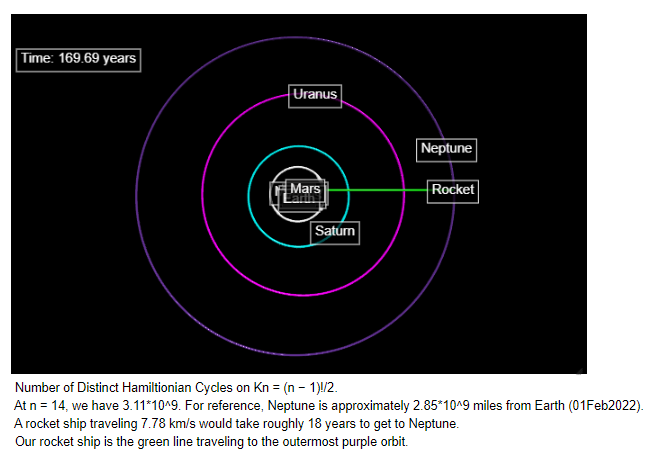

In [22]:
################### CONSTANTS ###################
G = 6.674e-20 #gravitational constant [km^3*kg^-1*s^-2]
max_time = 1e5

In [23]:
################### DATA STRUCTURES ###################
sun = {
    "mass": 1.989e30, #[kg]
    "pos": vector(0,0,0),
    "velocity": vector(0,0,0), #[km/s]
    "radius": 696000, #[km]
    "momentum": vector(0,0,0), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
mercury = {
    "mass": 3.285e23, #[kg]
    "pos": vector(-5.343e7,1.1272e7,5.941e6),
    "velocity": vector(-2.137e1,-4.530e1,-1.740), #[km/s]
    "radius": 2440, #[km]
    "momentum": 3.285e23*vector(-2.137e1,-4.530e1,-1.740), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
venus = {
    "mass": 4.868e24, #[kg]
    "pos": vector(-8.869e7,6.045e7,5.947e6),
    "velocity": vector(-1.986e1,-2.911e1,7.465e-1), #[km/s]
    "radius": 6051, #[km]
    "momentum": 4.868e24*vector(-1.986e1,-2.911e1,7.465e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
earth = {
    "mass": 5.972e24, #[kg]
    "pos": vector(-9.822e7,1.099e8,-4.540e3),
    "velocity": vector(-2.270e1,-1.997e1,1.517e-3), #[km/s]
    "radius": 6371, #[km]
    "momentum": 5.972e24*vector(-2.270e1,-1.997e1,1.517e-3), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
mars = {
    "mass": 6.417e23, #[kg]
    "pos": vector(-6.922e7,-2.128e8,-2.762e6),
    "velocity": vector(2.395e1,-5.412,-7.009e-1), #[km/s]
    "radius": 3389, #[km]
    "momentum": 6.417e23*vector(2.395e1,-5.412,-7.009e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
jupiter = {
    "mass": 1.898e27, #[kg]
    "pos": vector(7.082e8,-2.338e8,-1.487e7),
    "velocity": vector(3.945,1.303e1,-1.424e-1), #[km/s]
    "radius": 71492, #[km]
    "momentum": 1.898e27*vector(3.945,1.303e1,-1.424e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
saturn = {
    "mass": 5.683e26, #[kg]
    "pos": vector(1.058e9,-1.039e9,-2.405e7),
    "velocity": vector(6.236,6.885,-3.679e-1), #[km/s]
    "radius": 60268, #[km]
    "momentum": 5.683e26*vector(6.236,6.885,-3.679e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
uranus = {
    "mass": 8.681e25, #[kg]
    "pos": vector(2.141e9,2.029e9,-2.021e7),
    "velocity": vector(-4.731,4.639,7.816e-2), #[km/s]
    "radius": 25559, #[km]
    "momentum": 8.681e25*vector(-4.731,4.639,7.816e-2), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
neptune = {
    "mass": 1.024e26, #[kg]
    "pos": vector(4.435e9,-5.974e8,-8.991e7),
    "velocity": vector(6.953e-1,5.434,-1.280e-1), #[km/s]
    "radius": 24624, #[km]
    "momentum": 1.024e26*vector(6.953e-1,5.434,-1.280e-1), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }
rocket = {
    "mass": 122683, #[kg]
    "pos": vector(-9.822e7,1.099e8,-4.540e3),
    "velocity": vector(7.78,0,0), #[km/s]
    "radius": 0.00435, #[km]
    "momentum": 122683*vector(7.78,0,0), #[kg*km/s]
    "GForce": vector(0,0,0) #[Newtons]
      }

solarObjects = { #empty dictionary meant to hold all objects
    "sun": sun,
    "mercury": mercury,
    "venus": venus,
    "earth": earth,
    "mars": mars,
    "jupiter": jupiter,
    "saturn": saturn,
    "uranus": uranus,
    "neptune": neptune,
    "rocket": rocket
      } 

#store the average orbital velocites at each point in time
mercuryV = []
venusV = []
earthV = []
marsV = []
jupiterV = []
saturnV = []
uranusV = []
neptuneV = []
time = []

In [24]:
################### OBJECTS ###################
sun_sphere = sphere(
                pos=solarObjects['sun']['pos'],
                radius=solarObjects['sun']['radius']*20,
                color=color.yellow,
                label=label(pos=vector(0,0,0), text="Sun")
            )

mercury_sphere = sphere(
                pos=solarObjects['mercury']['pos'],
                radius=solarObjects['mercury']['radius']*1000,
                color=color.blue,
                make_trail = True,
                retain=50,
                label=label(pos=vector(-5.343e7,1.1272e7,5.941e6), text="Mercury")
            )

venus_sphere = sphere(
                pos=solarObjects['venus']['pos'],
                radius=solarObjects['venus']['radius']*800,
                color=color.orange,
                make_trail = True,
                retain=50,
                label=label(pos=vector(-8.869e7,6.045e7,5.947e6), text="Venus")
            )

earth_sphere = sphere(
                pos=solarObjects['earth']['pos'],
                radius=solarObjects['earth']['radius']*800,
                color=color.green,
                make_trail = True,
                retain=50,
                label=label(pos=vector(-9.822e7,1.099e8,-4.540e3), text="Earth")
            )

mars_sphere = sphere(
                pos=solarObjects['mars']['pos'],
                radius=solarObjects['mars']['radius']*1000,
                color=color.red,
                make_trail = True,
                retain=50,
                label=label(pos=vector(-6.922e7,-2.128e8,-2.762e6), text="Mars")
            )

jupiter_sphere = sphere(
                pos=solarObjects['jupiter']['pos'],
                radius=solarObjects['jupiter']['radius']*1000,
                color=color.white,
                make_trail = True,
                label=label(pos=vector(7.082e8,-2.338e8,-1.487e7), pixel_pos=True, text="Jupiter")
            )

saturn_sphere = sphere(
                pos=solarObjects['saturn']['pos'],
                radius=solarObjects['saturn']['radius']*1000,
                color=color.cyan,
                make_trail = True,
                label=label(pos=vector(1.058e9,-1.039e9,-2.405e7), text="Saturn")
            )

uranus_sphere = sphere(
                pos=solarObjects['uranus']['pos'],
                radius=solarObjects['uranus']['radius']*1000,
                color=color.magenta,
                make_trail = True,
                label=label(pos=vector(2.141e9,2.029e9,-2.021e7), text="Uranus")
            )

neptune_sphere = sphere(
                pos=solarObjects['neptune']['pos'],
                radius=solarObjects['neptune']['radius']*1000,
                color=color.purple,
                make_trail = True,
                label=label(pos=vector(4.435e9,-5.974e8,-8.991e7), text="Neptune")
            )

rocket_sphere = helix(
                pos=solarObjects['rocket']['pos'],
                radius=solarObjects['rocket']['radius']*10000,
                color=color.green,
                make_trail = True,
                label=label(pos=vector(-9.822e7,1.099e8,-4.540e3), text="Rocket")
            )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
################### INITIAL CONDITIONS ###################
t = 0 #[s]
dt = 100000 #[s] 
count = 0

In [26]:
################### FUNCTIONS ###################
def GForce(p1,p2): #force exterted on p1 by p2
    r = p1['pos'] - p2['pos']
    F = -G*p1['mass']*p2['mass']*norm(r)/mag(r)**2
    return F

def UpdateValues(p1):
    p = p1['momentum'] + p1['GForce']*dt
    pos = p1['pos'] + p*dt/p1['mass']
    return p, pos

In [27]:
################### MAIN LOOP ###################
time_label = label(pos=vector(75, 350, 0), pixel_pos=True, text="Time: " + str(count/365) + " years")
while count < 56000:
    rate(500)
    
    #Sum all of the forces on each solar object 
    solarObjects['mercury']['GForce'] = GForce(solarObjects['mercury'], solarObjects['sun'])\
                                        + GForce(solarObjects['mercury'], solarObjects['venus'])\
                                        + GForce(solarObjects['mercury'], solarObjects['earth'])\
                                        + GForce(solarObjects['mercury'], solarObjects['mars'])\
                                        + GForce(solarObjects['mercury'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['mercury'], solarObjects['saturn'])\
                                        + GForce(solarObjects['mercury'], solarObjects['uranus'])\
                                        + GForce(solarObjects['mercury'], solarObjects['neptune'])

    solarObjects['venus']['GForce'] = GForce(solarObjects['venus'], solarObjects['sun'])\
                                        + GForce(solarObjects['venus'], solarObjects['mercury'])\
                                        + GForce(solarObjects['venus'], solarObjects['earth'])\
                                        + GForce(solarObjects['venus'], solarObjects['mars'])\
                                        + GForce(solarObjects['venus'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['venus'], solarObjects['saturn'])\
                                        + GForce(solarObjects['venus'], solarObjects['uranus'])\
                                        + GForce(solarObjects['venus'], solarObjects['neptune'])

    solarObjects['earth']['GForce'] = GForce(solarObjects['earth'], solarObjects['sun'])\
                                        + GForce(solarObjects['earth'], solarObjects['mercury'])\
                                        + GForce(solarObjects['earth'], solarObjects['venus'])\
                                        + GForce(solarObjects['earth'], solarObjects['mars'])\
                                        + GForce(solarObjects['earth'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['earth'], solarObjects['saturn'])\
                                        + GForce(solarObjects['earth'], solarObjects['uranus'])\
                                        + GForce(solarObjects['earth'], solarObjects['neptune'])
    
    solarObjects['mars']['GForce'] = GForce(solarObjects['mars'], solarObjects['sun'])\
                                        + GForce(solarObjects['mars'], solarObjects['mercury'])\
                                        + GForce(solarObjects['mars'], solarObjects['venus'])\
                                        + GForce(solarObjects['mars'], solarObjects['earth'])\
                                        + GForce(solarObjects['mars'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['mars'], solarObjects['saturn'])\
                                        + GForce(solarObjects['mars'], solarObjects['uranus'])\
                                        + GForce(solarObjects['mars'], solarObjects['neptune'])
    
    solarObjects['jupiter']['GForce'] = GForce(solarObjects['jupiter'], solarObjects['sun'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['mercury'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['venus'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['mars'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['earth'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['saturn'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['uranus'])\
                                        + GForce(solarObjects['jupiter'], solarObjects['neptune'])
    
    solarObjects['saturn']['GForce'] = GForce(solarObjects['saturn'], solarObjects['sun'])\
                                        + GForce(solarObjects['saturn'], solarObjects['mercury'])\
                                        + GForce(solarObjects['saturn'], solarObjects['venus'])\
                                        + GForce(solarObjects['saturn'], solarObjects['mars'])\
                                        + GForce(solarObjects['saturn'], solarObjects['earth'])\
                                        + GForce(solarObjects['saturn'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['saturn'], solarObjects['uranus'])\
                                        + GForce(solarObjects['saturn'], solarObjects['neptune'])
    
    solarObjects['uranus']['GForce'] = GForce(solarObjects['uranus'], solarObjects['sun'])\
                                        + GForce(solarObjects['uranus'], solarObjects['mercury'])\
                                        + GForce(solarObjects['uranus'], solarObjects['venus'])\
                                        + GForce(solarObjects['uranus'], solarObjects['mars'])\
                                        + GForce(solarObjects['uranus'], solarObjects['earth'])\
                                        + GForce(solarObjects['uranus'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['uranus'], solarObjects['saturn'])\
                                        + GForce(solarObjects['uranus'], solarObjects['neptune'])
    
    solarObjects['neptune']['GForce'] = GForce(solarObjects['neptune'], solarObjects['sun'])\
                                        + GForce(solarObjects['neptune'], solarObjects['mercury'])\
                                        + GForce(solarObjects['neptune'], solarObjects['venus'])\
                                        + GForce(solarObjects['neptune'], solarObjects['mars'])\
                                        + GForce(solarObjects['neptune'], solarObjects['earth'])\
                                        + GForce(solarObjects['neptune'], solarObjects['jupiter'])\
                                        + GForce(solarObjects['neptune'], solarObjects['saturn'])\
                                        + GForce(solarObjects['neptune'], solarObjects['uranus'])

    #update the momentum and position of each solar object
    solarObjects['mercury']['momentum'], solarObjects['mercury']['pos'] = UpdateValues(solarObjects['mercury'])
    solarObjects['venus']['momentum'], solarObjects['venus']['pos'] = UpdateValues(solarObjects['venus'])    
    solarObjects['earth']['momentum'], solarObjects['earth']['pos'] = UpdateValues(solarObjects['earth'])
    solarObjects['mars']['momentum'], solarObjects['mars']['pos'] = UpdateValues(solarObjects['mars'])
    solarObjects['jupiter']['momentum'], solarObjects['jupiter']['pos'] = UpdateValues(solarObjects['jupiter'])
    solarObjects['saturn']['momentum'], solarObjects['saturn']['pos'] = UpdateValues(solarObjects['saturn'])
    solarObjects['uranus']['momentum'], solarObjects['uranus']['pos'] = UpdateValues(solarObjects['uranus'])
    solarObjects['neptune']['momentum'], solarObjects['neptune']['pos'] = UpdateValues(solarObjects['neptune'])
    
    #update labels
    mercury_sphere.label.pos = solarObjects['mercury']['pos']
    venus_sphere.label.pos = solarObjects['venus']['pos']
    earth_sphere.label.pos = solarObjects['earth']['pos']
    mars_sphere.label.pos = solarObjects['mars']['pos']
    jupiter_sphere.label.pos = solarObjects['jupiter']['pos']
    saturn_sphere.label.pos = solarObjects['saturn']['pos']
    uranus_sphere.label.pos = solarObjects['uranus']['pos']
    neptune_sphere.label.pos = solarObjects['neptune']['pos']
    
    #append values to the orbital velocity lists
    mercuryV.append(mag(solarObjects['mercury']['momentum']/solarObjects['mercury']['mass']))
    venusV.append(mag(solarObjects['venus']['momentum']/solarObjects['venus']['mass']))
    earthV.append(mag(solarObjects['earth']['momentum']/solarObjects['earth']['mass']))
    marsV.append(mag(solarObjects['mars']['momentum']/solarObjects['mars']['mass']))
    jupiterV.append(mag(solarObjects['jupiter']['momentum']/solarObjects['jupiter']['mass']))
    saturnV.append(mag(solarObjects['saturn']['momentum']/solarObjects['saturn']['mass']))
    uranusV.append(mag(solarObjects['uranus']['momentum']/solarObjects['uranus']['mass']))
    neptuneV.append(mag(solarObjects['neptune']['momentum']/solarObjects['neptune']['mass']))
    
    time.append(t)
    
    #set the visual position to that of the respective solar object
    mercury_sphere.pos = solarObjects['mercury']['pos']
    venus_sphere.pos = solarObjects['venus']['pos']
    earth_sphere.pos = solarObjects['earth']['pos']
    mars_sphere.pos = solarObjects['mars']['pos']
    jupiter_sphere.pos = solarObjects['jupiter']['pos']
    saturn_sphere.pos = solarObjects['saturn']['pos']
    uranus_sphere.pos = solarObjects['uranus']['pos']
    neptune_sphere.pos = solarObjects['neptune']['pos']
    
    if (count/330 >= 17.5): 
        rocket_sphere.pos = rocket_sphere.pos
        rocket_sphere.label.pos = rocket_sphere.pos
    else:
        speed = solarObjects['rocket']['velocity']
        rocket_sphere.pos += speed*dt
        rocket_sphere.label.pos = rocket_sphere.pos
    
    # Change to 350 to approximate
    time_label.text = "Time: {:.2f} years".format(count/330)
    count += 1
    t += dt

C:\Users\chris\anaconda3\envs\ece1180\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


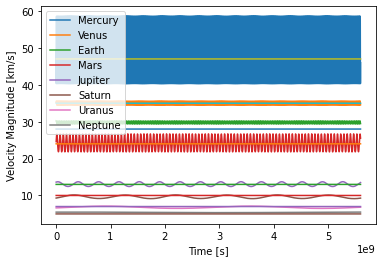

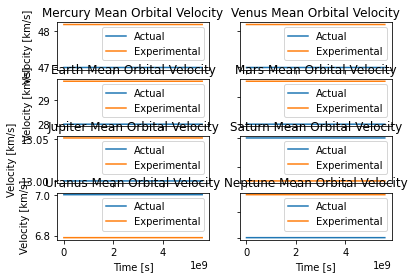

In [28]:
################### GRAPHING ###################
actualOV_mercury = [47] * len(time)
actualOV_venus = [35] * len(time)
actualOV_earth = [28] * len(time)
actualOV_mars = [24] * len(time)
actualOV_jupiter = [13] * len(time)
actualOV_saturn = [10] * len(time)
actualOV_uranus = [7] * len(time)
actualOV_neptune = [5] * len(time)

experimentalOV_mercury = [sum(mercuryV)/len(mercuryV)] * len(time)
experimentalOV_venus = [sum(venusV)/len(venusV)] * len(time)
experimentalOV_earth = [sum(earthV)/len(earthV)] * len(time)
experimentalOV_mars = [sum(marsV)/len(marsV)] * len(time)
experimentalOV_jupiter = [sum(jupiterV)/len(jupiterV)] * len(time)
experimentalOV_saturn = [sum(saturnV)/len(saturnV)] * len(time)
experimentalOV_uranus = [sum(uranusV)/len(uranusV)] * len(time)
experimentalOV_neptune = [sum(neptuneV)/len(neptuneV)] * len(time)
    
#FIRST GRAPH    
pyplot.plot(time, mercuryV)
pyplot.plot(time, venusV)
pyplot.plot(time, earthV)
pyplot.plot(time, marsV)
pyplot.plot(time, jupiterV)
pyplot.plot(time, saturnV)
pyplot.plot(time, uranusV)
pyplot.plot(time, neptuneV)
pyplot.plot(time, actualOV_mercury)
pyplot.plot(time, actualOV_venus)
pyplot.plot(time, actualOV_earth)
pyplot.plot(time, actualOV_mars)
pyplot.plot(time, actualOV_jupiter)
pyplot.plot(time, actualOV_saturn)
pyplot.plot(time, actualOV_uranus)
pyplot.plot(time, actualOV_neptune)
pyplot.xlabel('Time [s]')
pyplot.ylabel('Velocity Magnitude [km/s]')
pyplot.legend(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'])

#SECOND GRAPH (i.e. SUBPLOT)
fig, axs = pyplot.subplots(4, 2)
axs[0, 0].plot(time, actualOV_mercury)
axs[0, 0].plot(time, experimentalOV_mercury)
axs[0, 0].set_title('Mercury Mean Orbital Velocity')
axs[0, 0].legend(['Actual', 'Experimental'])
axs[0, 1].plot(time, actualOV_venus)
axs[0, 1].plot(time, experimentalOV_venus)
axs[0, 1].set_title('Venus Mean Orbital Velocity')
axs[0, 1].legend(['Actual', 'Experimental'])
axs[1, 0].plot(time, actualOV_earth)
axs[1, 0].plot(time, experimentalOV_earth)
axs[1, 0].set_title('Earth Mean Orbital Velocity')
axs[1, 0].legend(['Actual', 'Experimental'])
axs[1, 1].plot(time, actualOV_mars)
axs[1, 1].plot(time, experimentalOV_mars)
axs[1, 1].set_title('Mars Mean Orbital Velocity')
axs[1, 1].legend(['Actual', 'Experimental'])
axs[2, 0].plot(time, actualOV_jupiter)
axs[2, 0].plot(time, experimentalOV_jupiter)
axs[2, 0].set_title('Jupiter Mean Orbital Velocity')
axs[2, 0].legend(['Actual', 'Experimental'])
axs[2, 1].plot(time, actualOV_saturn)
axs[2, 1].plot(time, experimentalOV_saturn)
axs[2, 1].set_title('Saturn Mean Orbital Velocity')
axs[2, 1].legend(['Actual', 'Experimental'])
axs[3, 0].plot(time, actualOV_uranus)
axs[3, 0].plot(time, experimentalOV_uranus)
axs[3, 0].set_title('Uranus Mean Orbital Velocity')
axs[3, 0].legend(['Actual', 'Experimental'])
axs[3, 1].plot(time, actualOV_neptune)
axs[3, 1].plot(time, experimentalOV_neptune)
axs[3, 1].set_title('Neptune Mean Orbital Velocity')
axs[3, 1].legend(['Actual', 'Experimental'])

for ax in axs.flat:
    ax.set(xlabel='Time [s]', ylabel='Velocity [km/s]')

#HIDE X LABELS AND TICK LABELS FOR TOP PLOTS ANDY TICKS FOR RIGHT PLOTS
for ax in axs.flat:
    ax.label_outer()

<h2>Validation/Results</h2>
<p>The methods used for validation were visual validation and graphical validation. Visual in the case of simply looking at the simulation and making sure that the orbits looked correct and that the velocity increased and decreased when it should. Graphical in the terms of the multitude of charts that were used at the bottom of the simulation. The first chart models the Velocity Magnitude [km/s] vs time [s] of each planet. It is clear to see the periodic, sinusoidal velocity that you would expect when an object orbits with an eliptical pattern, increaseing in velocity when it gets closer to the sun and decreasing when it moves away. This plot also compares the actual orbtial velocity according to NASA of each planet and places it on the graph in realtion to the orbital velocies of time. The second chart also shows the actual orbital veloctiy vs the experimental orbital velocity.</p>
<p>When testing the simulation with different values of dt, you can see a clear difference in the overall speed of the program, however once you make the dt value too big, you will begin to see "skips" in the orbits of the planets. This is due to the time step being larger than expected for the next value of the orbital position, causing a visable jump between two far apart locations. Making the program look less like a spherical orbit but more of a polygonal orbit, which is just not right. </p>

<h4> Link to the Program: https://glowscript.org/#/user/tailor/folder/MyPrograms/program/Traveling2Neptune </h4>